In [1]:
# Libraries Imported - Complete

import pylab
import numpy as np
from numpy import linalg as LA
from scipy.linalg import expm
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Hamiltonian Function defined - Complete

def Hamiltonian(alpha,h):

    Sx = np.array([[0,1],[1,0]])
    Sy = np.array([[0,-1j],[1j,0]])
    Sz = np.array([[1,0],[0,-1]])
    I  = np.array([[1,0],[0,1]])

    H = ((alpha*np.kron(np.kron(Sx,Sx),I))
       + (alpha*np.kron(np.kron(Sy,Sy),I))
       + (alpha*np.kron(np.kron(I,Sx),Sx))
       + (alpha*np.kron(np.kron(I,Sy),Sy))
       + (h*np.kron(np.kron(I,Sz),I)))

    return H

np.set_printoptions(linewidth=100)
Hamiltonian(1,0.5).real

array([[ 0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.5,  2. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  2. , -0.5,  0. ,  2. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -0.5,  0. ,  2. ,  0. ,  0. ],
       [ 0. ,  0. ,  2. ,  0. ,  0.5,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  2. ,  0. ,  0.5,  2. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  2. , -0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.5]])

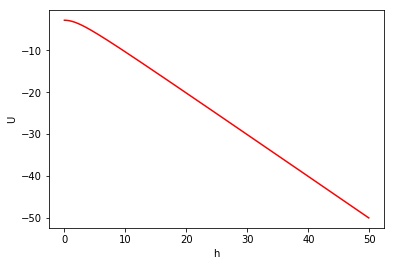

In [3]:
# plot of h vs <H> - complete

h = np.arange(0,50,0.1)
eig_gs = np.zeros(h.size, dtype = 'complex')

for i in range(h.size):
    H = Hamiltonian(1,h[i])
    eigvals, eigvecs = LA.eigh(H)
    # Density of the GS
    g_state = eigvecs[:,0]
    rho_gs = np.outer(g_state, g_state.conjugate())
    # Expectation value of the energy GS density matrix
    eig_gs[i] = np.trace(rho_gs.dot(H))
    
#plt.title("Impurity Value [h] vs. Ground State Energy [U]")
plt.xlabel("h")
plt.ylabel("U")
plt.plot(h, eig_gs.real,"r")

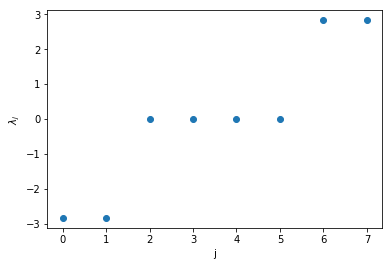

In [4]:
# Plot of the eigenvalues h=0
h = 0
j = np.arange(0,8,1)
eig_gs = np.zeros(8, dtype = 'complex')

for i in range(8):
    H = Hamiltonian(1,h)
    eigvals, eigvecs = LA.eigh(H)
    # Density of the GS
    g_state = eigvecs[:,0]
    rho_gs = np.outer(g_state, g_state.conjugate())
    # Expectation value of the energy GS density matrix
    eig_gs[i] = np.trace(rho_gs.dot(H))
    
#plt.title("j vs. $\lambda_j$: h=0")
plt.xlabel("j")
plt.ylabel("$\lambda_j$")
plt.plot(j, eigvals,"o")

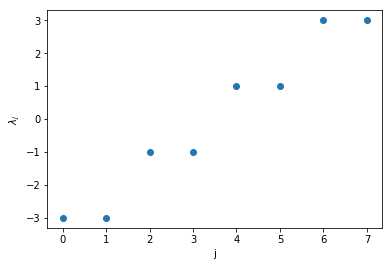

In [5]:
# Plot of the eigenvalues h=1
h = 1
j = np.arange(0,8,1)
eig_gs = np.zeros(8, dtype = 'complex')

for i in range(8):
    H = Hamiltonian(1,h)
    eigvals, eigvecs = LA.eigh(H)
    # Density of the GS
    g_state = eigvecs[:,0]
    rho_gs = np.outer(g_state, g_state.conjugate())
    # Expectation value of the energy GS density matrix
    eig_gs[i] = np.trace(rho_gs.dot(H))
    
#plt.title("j vs. $\lambda_j$: h=1")
plt.xlabel("j")
plt.ylabel("$\lambda_j$")
plt.plot(j, eigvals,"o")

In [6]:
# Purity test - Does it return 1 for each result? - Testing Successful

h = np.arange(0,1,0.1)
for i in range(h.size):
    H = Hamiltonian(1,h[i])
    # Purity
    eigvals, eigvecs = LA.eigh(H)
    # Density of the GS
    g_state = eigvecs[:,0]
    rho_gs = np.outer(g_state, g_state.conjugate())

    print (np.trace(rho_gs.dot(rho_gs))) # This has to return 1!
    
# Function succeeds in producing 1 over 10 states

(0.9999999999999984+0j)
(1.0000000000000002+0j)
(0.9999999999999996+0j)
(0.9999999999999997+0j)
(1+0j)
(0.9999999999999997+0j)
(1.0000000000000004+0j)
(0.9999999999999999+0j)
(0.9999999999999993+0j)
(0.999999999999999+0j)


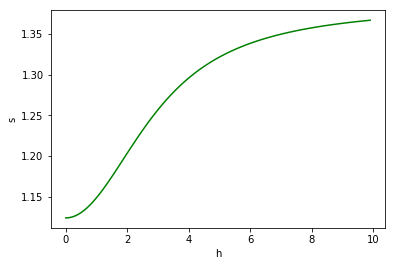

In [7]:
# von Neumann entropy as a function of h - Complete
# Definition of a mixed state: [Thermal Density Matrix used]

def entropy(beta, h, alpha=1.0):
    H = Hamiltonian(alpha, h)
    rho_thermal = expm(-1.0 * beta * H)
    tr = np.trace(rho_thermal)
    rho_thermal = rho_thermal / tr
    eigvals_rho_thermal, eigvecs_rho_thermal = np.linalg.eigh(rho_thermal)
    # Entropy
    s = -np.sum(eigvals_rho_thermal*np.log(eigvals_rho_thermal))
    return s

h = np.arange(0,10,0.1)
beta = 1
s = [entropy(beta, hi) for hi in h]

#plt.title("Impurity Value [h] vs Entropy [s]")
plt.xlabel("h")
plt.ylabel("s")
plt.plot(h,s,"g")
plt.show()

In [8]:
# von Neumann entropy as a function of beta - Complete
# Definition of a mixed state: [Thermal Density Matrix used]

h = 2
beta = np.arange(0,2.5,0.3125)
for i in range(beta.size):
    H = Hamiltonian(1.0, beta[i] )
    rho_thermal = expm(-1.0 * beta * H)
    tr = np.trace(rho_thermal)
    rho_thermal = rho_thermal / tr
    np.set_printoptions(linewidth=100)
    eigvals_rho_thermal, eigvecs_rho_thermal = LA.eigh(rho_thermal)
    # Entropy
    s = 0.0
    for i in range(eigvals_rho_thermal.size):
        s += -1.0 * (eigvals_rho_thermal[i] * np.log(eigvals_rho_thermal[i]))
    print(s)



0.9164418187119863
0.9434323767035009
0.9670453205545106
0.9854800852302894
0.9959824860954468
0.9960880106717632
0.9849155568918591
0.9635502203088602


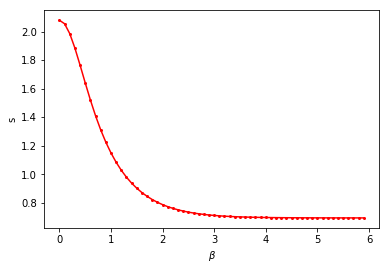

In [9]:
# von Neumann entropy as a function of beta - Complete
def Entropy(beta, h, alpha=1.0):
    H = Hamiltonian(alpha, h)
    rho_thermal = expm(-1.0 * beta * H)
    tr = np.trace(rho_thermal)
    rho_thermal = rho_thermal / tr
    eigvals_rho_thermal, eigvecs_rho_thermal = np.linalg.eigh(rho_thermal)
    # Entropy
    s = -np.sum(eigvals_rho_thermal*np.log(eigvals_rho_thermal))
    return s

h = 1
beta = np.arange(0,6,0.1)   
s = [Entropy(betai, h) for betai in beta]


#plt.title("1/Temperature [beta] vs Entropy [s]")
plt.xlabel(r"$\beta$")
plt.ylabel("s")
plt.plot(beta,s,"r-o",markersize=2)
plt.show()


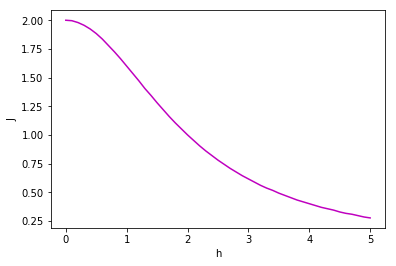

In [10]:
sigmaz_1 = np.array([0.5,.501,.505,.511,.519,.529,.541,.555,.569,.584
,.6,.616,.632,.649,.664,.680,.695,.710,.724,.737
,.75,.762,.774,.785,.795,.805,.814,.823,.831,.839,.846,.853,.86,.866,.871
,.877,.882,.887,.892,.896,.9,.904,.908,.911,.914,.918,.921,.923,.926,.929,.931])

gamma = 1
mu = 1
sigmaz_1 = mu*sigmaz_1
J1 = []

for i in range(sigmaz_1.size):
    expec_sz = sigmaz_1[i]
    J = 4*gamma*(mu-expec_sz)
    J1.append(J.real)
    #print(J)

h = np.arange(0,5.1,0.1)
#plt.title("Impurity Value [h] vs. Current [J]")
plt.xlabel("h")
plt.ylabel("J")
plt.plot(h,J1,"m")



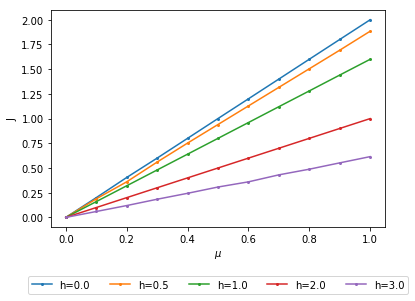

In [11]:
gamma=1


sigz_muvar_h0 = np.array([0,.05,.099,.15,.2
,.2499,.3,.35,.3999,.4499,.5])
sigz_muvar_h005 = np.array([-1.94e-16,.053,.11
,.16,.212,.265,.318,.371,.424,.477,.529])
sigz_muvar_h01 = np.array([-5.55e-17,.06,.12,.18,.24
,.3,.36,.4199,.48,.5399,.6])
sigz_muvar_h02 = np.array([-2.78e-17,.075,.15,.225,.3,.375
,.45,.525,.6,.675,.75])
sigz_muvar_h03 = np.array([0,.085,.17,.254,.339,.4231
,.51,.5923,.678,.762,.8462])

mu = np.arange(0,1.1,0.1)

J1 = []
J2 = []
J3 = []
J4 = []
J5 = []

for i in range(sigz_muvar_h0.size):
    expec_sz_1 = sigz_muvar_h0[i]
    J_1 = 4*gamma*(mu[i]-expec_sz_1)
    J1.append(J_1.real)
    #print(J_1)
    
for i in range(sigz_muvar_h005.size):
    expec_sz_2 = sigz_muvar_h005[i]
    J_2 = 4*gamma*(mu[i]-expec_sz_2)
    J2.append(J_2.real)
    #print(J_2)
    
for i in range(sigz_muvar_h01.size):
    expec_sz_3 = sigz_muvar_h01[i]
    J_3 = 4*gamma*(mu[i]-expec_sz_3)
    J3.append(J_3.real)
    #print(J_3)
    
for i in range(sigz_muvar_h02.size):
    expec_sz_4 = sigz_muvar_h02[i]
    J_4 = 4*gamma*(mu[i]-expec_sz_4)
    J4.append(J_4.real)
    #print(J_4)
    
for i in range(sigz_muvar_h03.size):
    expec_sz_5 = sigz_muvar_h03[i]
    J_5 = 4*gamma*(mu[i]-expec_sz_5)
    J5.append(J_5.real)
    #print(J_5)

#plt.title("mu vs. <sigz> for h=0(cyan),0.5(green),1(purple),2(blue),3(black)")
plt.xlabel("$\mu$")
plt.ylabel("J")
#plt.axhline(y=0.8462, color='r', linestyle='--', zorder=0)
#plt.axhline(y=0.75, color='r', linestyle='--', zorder=0)
#plt.axhline(y=0.6, color='r', linestyle='--', zorder=0)
#plt.axhline(y=0.529, color='r', linestyle='--', zorder=0)
#plt.axhline(y=0.5, color='r', linestyle='--', zorder=0)
plt.plot(mu,J1,"-o",markersize=2,label='h=0.0')
plt.plot(mu,J2,"-o",markersize=2,label='h=0.5')
plt.plot(mu,J3,"-o",markersize=2,label='h=1.0')
plt.plot(mu,J4,"-o",markersize=2,label='h=2.0')
plt.plot(mu,J5,"-o",markersize=2,label='h=3.0')
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)





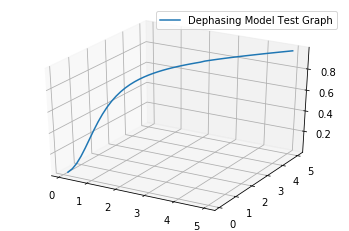

In [12]:
# 3D Main Plot: h vs gamma vs J step 1. step size is the same at each interval for h and gamma
h = np.arange(0.1,5.1,0.1)
gamma = h
sigz_hgam = np.array([.009998,.03988,.08878,.15403
,.230769,.312854,.394358,.4708311,.539697879,.6,.6518698
,.696033486,.73345752165,.7651390123,.792,.814845635
,.8343567,.851098499,.865535727,.8780487,.8889486,.89848986
,.906881,.914295,.9208731,.9267338,.93197569,.93668129
,.9409202379,.94475138,.951383,.9542629,.956895,.959309
,.961526,.9635675,.96545144,.9671934,.968807,.97030539
,.9716983,.972995,.974206,.975337,.97639567,.977387,.978318
,.97919266,.98,.9807902])

# Graph doesnt mean anything just testing 3d graphing package
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

x = gamma
y = h
z = sigz_hgam

ax.plot(x, y, z, label='Dephasing Model Test Graph')
ax.legend()

plt.show()

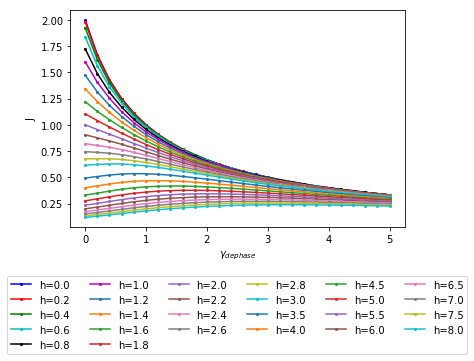

In [13]:
# We fix h, and vary dephase gamma and then get J. 
# We do this for 5 values of h and then 5 plots superimposed.
# 1


h00 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
h02 = np.array([.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2])
h04 = np.array([.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4])
h06 = np.array([.6,.6,.6,.6,.6,.6,.6,.6,.6,.6,.6,.6,.6,.6,.6,.6,.6,.6,.6,.6,.6,.6,.6,.6,.6,.6])
h08 = np.array([.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8])
h10 = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
h12 = np.array([1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,
1.2,1.2,1.2,1.2,1.2,1.2])
h14 = np.array([1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,
1.4,1.4,1.4,1.4,1.4,1.4])
h16 = np.array([1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,
1.6,1.6,1.6,1.6,1.6,1.6])
h18 = np.array([1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,
1.8,1.8,1.8,1.8,1.8,1.8])
h20 = np.array([2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,])
h22 = np.array([2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,
2.2,2.2,2.2,2.2,2.2,2.2])
h24 = np.array([2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,
2.4,2.4,2.4,2.4,2.4,2.4])
h26 = np.array([2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,
2.6,2.6,2.6,2.6,2.6,2.6])
h28 = np.array([2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,
2.8,2.8,2.8,2.8,2.8,2.8])
h30 = np.array([3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3])
h35 = np.array([3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,
3.5,3.5,3.5,3.5,3.5,3.5])
h40 = np.array([4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4])
h45 = np.array([4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,
4.5,4.5,4.5,4.5,4.5,4.5])
h50 = np.array([5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5])
h55 = np.array([5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,
5.5,5.5,5.5,5.5,5.5,5.5])
h60 = np.array([6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6])
h65 = np.array([6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,
6.5,6.5,6.5,6.5,6.5,6.5])
h70 = np.array([7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7])
h75 = np.array([7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,
7.5,7.5,7.5,7.5,7.5,7.5])
h80 = np.array([8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8])
mu=1
boundary_gamma=1
dephase_gamma = np.arange(0,5.2,0.2)

sig_zh00 = np.array([.5,.583,.643,.6875,.722,.75,.773,.792
,.808,.821,.833,.84375,.853,.861,.868,.875,.881,.886,.891
,.896,.9,.904,.907,.911,.914,.917])
    
sig_zh02 = np.array([.505,.586,.645,.689,.723,.751,.773
,.792,.808,.822,.834,.844,.853,.861,.869,.875,.881,.886,.891
,.896,.9,.904,.907,.911,.914,.917])

sig_zh04 = np.array([.519,.595,.651,.693,.726,.753,.775,.793
,.809,.822,.834,.844,.854,.862,.869,.875,.881,.887,.892,.896
,.9,.904,.908,.911,.914,.917])

sig_zh06 = np.array([.541,.6095,.66,.699,.731,.756,.777,
.795,.811,.824,.835,.845,.854,.862,.869,.876,.882,.887
,.892,.896,.9,.904,.908,.911,.914,.917])

sig_zh08 = np.array([.569,.628,.673,.708,.737,.761,.781
,.798,.813,.825,.837,.846,.855,.863,.87,.876,.882,.887,.892
,.897,.9,.904,.908,.911,.914,.917])

sig_zh10 = np.array([0.6,.649,.687,.719,.745,.767,.785,.801
,.815,.828,.838,.846,.856,.864,.871,.877,.883,.888,.893
,.897,.901,.905,.909,.912,.915,.917])

sig_zh12 = np.array([.632,.672,.704,.7304,.7535,.7733
,.7905,.8055,.8186,.8302,.8405,.8497,.8579,.8653,.87195
,.878,.8836,.8886,.8933,.8976,.902,.905,.909,.912,.915,.9175])

sig_zh14 = np.array([.6644,.6949,.7206,.7432,.7631,.7807
,.7963,.81,.8223,.8332,.843,.8517,.8596,.8667,.8732,.8791
,.8845,.8894,.894,.8982,.902,.906,.909,.9122,.915,.9179])

sig_zh16 = np.array([.6951,.718,.738,.7565,.7733,.7886
,.8025,.8151,.82634,.83651,.8457,.853975,.8615,.8683,.8746
,.8803,.8855,.89034,.8948,.8989,.9027,.9063,.90955,.9126
,.9155,.9182])

sig_zh18 = np.array([.724,.74,.7554,.76995,.7839,.79698
,.8092,.8204,.8307,.8401,.8487,.8565,.8636,.8701,.8761
,.8816,.8867,.8915,.8957,.8997,.9034,.9069,.9101,.9131
,.91597,.9186])

sig_zh20 = np.array([.75,.7614,.7723,.7834,.7946,.8056
,.8161,.82601,.8353,.84392,.8519,.8592,.8659,.8721,.8778
,.8831,.8879,.8925,.8966,.9001,.9042,.9076,.9107,.9137
,.9165,.9191])

sig_zh22 = np.array([.7738,.78101,.7884,.7965,.8052,.8142
,.8232,.8319,.84015,.8479,.8552,.86202,.86832,.8742,.8796
,.88463,.8893,.8937,.8977,.9015,.905,.9083,.9114,.9143
,.917,.92])

sig_zh24 = np.array([.7951,.7992,.8036,.8091,.8157,.8229
,.83035,.8378,.8451,.8521,.8588,.865,.87089,.8764,.8815
,.8863,.8908,.8949,.8988,.903,.906,.9091,.9121,.91493
,.91759,.9201])

sig_zh26 = np.array([.8141,.8157,.8178,.8212,.8259,.83141
,.8375,.8438,.8502,.8564,.8624,.8681,.8736,.8787,.8835
,.888,.8923,.8963,.9,.9035,.9068,.9099,.91286,.9156
,.9182,.92067])

# And finally here is where the magic happens

sig_zh28 = np.array([.8311,.8308,.8310,.8326,.8356,.8397
,.8446,.8498,.8553,.86075,.8661,.8713,.8763,.8811,.8856
,.8899,.8939,.8977,.9013,.9047,.9079,.9109,.9137,.91636
,.9189,.9213])

sig_zh30 = np.array([.8462,.8445,.8432,.8434,.845,.8478
,.8515,.8558,.8604,.8651,.8699,.8746,.8792,.8836,.8878
,.8918,.8956,.8992,.9026,.9059,.9089,.9118,.9145,.9171
,.9196,.9219])

sig_zh35 = np.array([.8769,.8732,.86965,.8673,.8663,.8667
,.868,.87,.873,.8761,.8795,.882965,.8865,.89,.8934,.8968
,.9,.9032,.9062,.909,.9117,.9144,.9169,.9192,.9215,.9236])

sig_zh40 = np.array([.9,.8954,.8909,.8872,.8847,.8833,.8831
,.8836,.8849,.8867,.8889,.8913,.8939,.8966,.8993,.902,.9047
,.9073,.9099,.9124,.9148,.9171,.9194,.9215,.9236,.9256])

sig_zh45 = np.array([.9175,.9128,.9079,.9036,.9,.8978,.8964,.8958,.896
,.89675,.8979,.8994,.9012,.9032,.9052,.9073,.9095,.9117,.9138,.916,.918
,.92,.922,.92396,.9258,.9276])

sig_zh50 = np.array([.931,.9264,.9215,.917,.9132,.9103,.908,.9068,.9061
,.90604,.90643,.9072,.9083,.9096,.911,.9127,.9143,.9161,.9178,.9196,.9214
,.9231,.9248,.92652,.9282,.9298])

sig_zh55 = np.array([.94161,.9373,.9326,.9281,.9242,.9209,.9184,.9165
,.9152,.91455,.9143,.9145,.91499,.91575,.9167,.9178,.9191,.9204,.9218
,.9233,.9247,.9262,.9277,.9292,.9306,.9320])

sig_zh60 = np.array([.95,.946,.9416,.9373,.9334,.93,.9272,.925,.9234
,.9223,.9216,.921272,.921305,.921614,.9222,.9229,.9237,.9247,.9258,.9269
,.928125,.9293,.9306,.9318,.9331,.9343])

sig_zh65 = np.array([.9568,.9531,.949,.9449,.9411,.9378,.9349,.9325,.9306
,.9292,.9282,.9275,.9272,.9271,.9273,.9277,.9282,.9289,.9297,.9305,.9315
,.9325,.9335,.9345,.9356,.9366])

sig_zh70 = np.array([.9623,.9589,.9551,.9513,.9477,.9444,.9416,.9391,.9371
,.93542,.9342,.9332,.9326,.9323,.93221,.93224,.9325,.9329,.9334,.9340,.9348
,.93552,.9363,.9372,.9381,.939])

sig_zh75 = np.array([.9668,.9638,.9603,.9567,.9533,.9502,.94735,.9449,.9428
,.94099,.9396,.9384,.9376,.937,.9367,.9365,.9366,.9367,.937,.9374,.9379,.9385
,.939148,.93983,.94055,.94131])

sig_zh80 = np.array([.9706,.9678,.96461,.9613,.9581,.9551,.9524,.9499,.94781
,.94598,.94444,.9432,.9422,.94145,.94091,.94057,.9404,.94038,.94049,.94071
,.94103,.9414,.9419,.94242,.94299,.943603])

sig_zh100 = np.array([.98,.9788,.9765,.974,.972,.969,.967
,.965,.963,.961,.9595,.958,.957,.9558,.9549,.9541,.9535,
.95295785,.95256,.95227,.9521,.95198,.951957,.952,.952114
,.95227])


J1 = []

for i in range(sig_zh00.size):
    expec_sz_1 = sig_zh00[i]
    J_1 = 4*boundary_gamma*(mu-expec_sz_1)
    J1.append(J_1.real)
    #print(J_1)
    
J2 = []

for i in range(sig_zh02.size):
    expec_sz_2 = sig_zh02[i]
    J_2 = 4*boundary_gamma*(mu-expec_sz_2)
    J2.append(J_2.real)
    #print(J_2)
    
J3 = []

for i in range(sig_zh04.size):
    expec_sz_3 = sig_zh04[i]
    J_3 = 4*boundary_gamma*(mu-expec_sz_3)
    J3.append(J_3.real)
    #print(J_3)
    

J4 = []

for i in range(sig_zh06.size):
    expec_sz_4 = sig_zh06[i]
    J_4 = 4*boundary_gamma*(mu-expec_sz_4)
    J4.append(J_4.real)
    #print(J_4)
    
J5 = []

for i in range(sig_zh08.size):
    expec_sz_5 = sig_zh08[i]
    J_5 = 4*boundary_gamma*(mu-expec_sz_5)
    J5.append(J_5.real)
    #print(J_5)
    
J6 = []

for i in range(sig_zh10.size):
    expec_sz_6 = sig_zh10[i]
    J_6 = 4*boundary_gamma*(mu-expec_sz_6)
    J6.append(J_6.real)
    #print(J_6)
    
J7 = []

for i in range(sig_zh12.size):
    expec_sz_7 = sig_zh12[i]
    J_7 = 4*boundary_gamma*(mu-expec_sz_7)
    J7.append(J_7.real)
    #print(J_7)

J8 = []
   
for i in range(sig_zh14.size):
    expec_sz_8 = sig_zh14[i]
    J_8 = 4*boundary_gamma*(mu-expec_sz_8)
    J8.append(J_8.real)
    #print(J_8)

J9 = []
    
for i in range(sig_zh16.size):
    expec_sz_9 = sig_zh16[i]
    J_9 = 4*boundary_gamma*(mu-expec_sz_9)
    J9.append(J_9.real)
    #print(J_9)

J10 = []
       
for i in range(sig_zh18.size):
    expec_sz_10 = sig_zh18[i]
    J_10 = 4*boundary_gamma*(mu-expec_sz_10)
    J10.append(J_10.real)
    #print(J_10)

J11 = []
       
for i in range(sig_zh20.size):
    expec_sz_11 = sig_zh20[i]
    J_11 = 4*boundary_gamma*(mu-expec_sz_11)
    J11.append(J_11.real)
    #print(J_11)

J12 = []
      
for i in range(sig_zh22.size):
    expec_sz_12 = sig_zh22[i]
    J_12 = 4*boundary_gamma*(mu-expec_sz_12)
    J12.append(J_12.real)
    #print(J_12)
    
J13 = []
      
for i in range(sig_zh24.size):
    expec_sz_13 = sig_zh24[i]
    J_13 = 4*boundary_gamma*(mu-expec_sz_13)
    J13.append(J_13.real)
    #print(J_13)
    
J14 = []
      
for i in range(sig_zh26.size):
    expec_sz_14 = sig_zh26[i]
    J_14 = 4*boundary_gamma*(mu-expec_sz_14)
    J14.append(J_14.real)
    #print(J_14)

J15 = []
      
for i in range(sig_zh28.size):
    expec_sz_15 = sig_zh28[i]
    J_15 = 4*boundary_gamma*(mu-expec_sz_15)
    J15.append(J_15.real)
    #print(J_15)
    
J16 = []
      
for i in range(sig_zh30.size):
    expec_sz_16 = sig_zh30[i]
    J_16 = 4*boundary_gamma*(mu-expec_sz_16)
    J16.append(J_16.real)
    #print(J_16)
    
J17 = []
      
for i in range(sig_zh35.size):
    expec_sz_17 = sig_zh35[i]
    J_17 = 4*boundary_gamma*(mu-expec_sz_17)
    J17.append(J_17.real)
    #print(J_17)
    
J18 = []
      
for i in range(sig_zh40.size):
    expec_sz_18 = sig_zh40[i]
    J_18 = 4*boundary_gamma*(mu-expec_sz_18)
    J18.append(J_18.real)
    #print(J_18)
    
J19 = []
      
for i in range(sig_zh45.size):
    expec_sz_19 = sig_zh45[i]
    J_19 = 4*boundary_gamma*(mu-expec_sz_19)
    J19.append(J_19.real)
    #print(J_19)
    
J20 = []
      
for i in range(sig_zh50.size):
    expec_sz_20 = sig_zh50[i]
    J_20 = 4*boundary_gamma*(mu-expec_sz_20)
    J20.append(J_20.real)
    #print(J_20)
    
J21 = []
      
for i in range(sig_zh55.size):
    expec_sz_21 = sig_zh55[i]
    J_21 = 4*boundary_gamma*(mu-expec_sz_21)
    J21.append(J_21.real)
    #print(J_21)
    
J22 = []
      
for i in range(sig_zh60.size):
    expec_sz_22 = sig_zh60[i]
    J_22 = 4*boundary_gamma*(mu-expec_sz_22)
    J22.append(J_22.real)
    #print(J_22)
    
J23 = []
      
for i in range(sig_zh65.size):
    expec_sz_23 = sig_zh65[i]
    J_23 = 4*boundary_gamma*(mu-expec_sz_23)
    J23.append(J_23.real)
    #print(J_23)
    
J24 = []
      
for i in range(sig_zh70.size):
    expec_sz_24 = sig_zh70[i]
    J_24 = 4*boundary_gamma*(mu-expec_sz_24)
    J24.append(J_24.real)
    #print(J_24)
    
J25 = []
      
for i in range(sig_zh75.size):
    expec_sz_25 = sig_zh75[i]
    J_25 = 4*boundary_gamma*(mu-expec_sz_25)
    J25.append(J_25.real)
    #print(J_25)
    
J26 = []
      
for i in range(sig_zh80.size):
    expec_sz_26 = sig_zh80[i]
    J_26 = 4*boundary_gamma*(mu-expec_sz_26)
    J26.append(J_26.real)
    #print(J_26)
    
Jn = []
      
for i in range(sig_zh100.size):
    expec_sz_n = sig_zh100[i]
    J_n = 4*boundary_gamma*(mu-expec_sz_n)
    Jn.append(J_n.real)
    #print(J_n)
    
plt.xlabel('$\gamma_{dephase}$')
plt.ylabel('J')
pylab.plot(dephase_gamma,J1,'b-o',markersize=2,label='h=0.0')
pylab.plot(dephase_gamma,J2,'r-o',markersize=2,label="h=0.2")
pylab.plot(dephase_gamma,J3,'g-o',markersize=2,label="h=0.4")
pylab.plot(dephase_gamma,J4,'c-o',markersize=2,label="h=0.6")
pylab.plot(dephase_gamma,J5,'k-o',markersize=2,label="h=0.8")
pylab.plot(dephase_gamma,J6,'m-o',markersize=2,label="h=1.0")
pylab.plot(dephase_gamma,J7,'-o',markersize=2,label='h=1.2')
pylab.plot(dephase_gamma,J8,'-o',markersize=2,label='h=1.4')
pylab.plot(dephase_gamma,J9,'-o',markersize=2,label='h=1.6')
pylab.plot(dephase_gamma,J10,'-o',markersize=2,label='h=1.8')
pylab.plot(dephase_gamma,J11,'-o',markersize=2,label='h=2.0')
pylab.plot(dephase_gamma,J12,'-o',markersize=2,label='h=2.2')
pylab.plot(dephase_gamma,J13,'-o',markersize=2,label='h=2.4')
pylab.plot(dephase_gamma,J14,'-o',markersize=2,label='h=2.6')
pylab.plot(dephase_gamma,J15,'-o',markersize=2,label='h=2.8')
pylab.plot(dephase_gamma,J16,'-o',markersize=2,label='h=3.0')
pylab.plot(dephase_gamma,J17,'-o',markersize=2,label='h=3.5')
pylab.plot(dephase_gamma,J18,'-o',markersize=2,label='h=4.0')
pylab.plot(dephase_gamma,J19,'-o',markersize=2,label='h=4.5')
pylab.plot(dephase_gamma,J20,'-o',markersize=2,label='h=5.0')
pylab.plot(dephase_gamma,J21,'-o',markersize=2,label='h=5.5')
pylab.plot(dephase_gamma,J22,'-o',markersize=2,label='h=6.0')
pylab.plot(dephase_gamma,J23,'-o',markersize=2,label='h=6.5')
pylab.plot(dephase_gamma,J24,'-o',markersize=2,label='h=7.0')
pylab.plot(dephase_gamma,J25,'-o',markersize=2,label='h=7.5')
pylab.plot(dephase_gamma,J26,'-o',markersize=2,label='h=8.0')
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=6)
pylab.show()

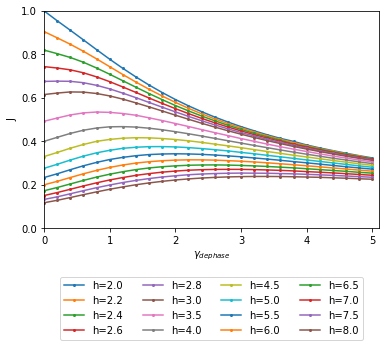

In [14]:
plt.xlabel('$\gamma_{dephase}$')
plt.ylabel('J')
plt.ylim(0, 1)
plt.xlim(0,5.1)
pylab.plot(dephase_gamma,J11,'-o',markersize=2,label='h=2.0')
pylab.plot(dephase_gamma,J12,'-o',markersize=2,label='h=2.2')
pylab.plot(dephase_gamma,J13,'-o',markersize=2,label='h=2.4')
pylab.plot(dephase_gamma,J14,'-o',markersize=2,label='h=2.6')
pylab.plot(dephase_gamma,J15,'-o',markersize=2,label='h=2.8')
pylab.plot(dephase_gamma,J16,'-o',markersize=2,label='h=3.0')
pylab.plot(dephase_gamma,J17,'-o',markersize=2,label='h=3.5')
pylab.plot(dephase_gamma,J18,'-o',markersize=2,label='h=4.0')
pylab.plot(dephase_gamma,J19,'-o',markersize=2,label='h=4.5')
pylab.plot(dephase_gamma,J20,'-o',markersize=2,label='h=5.0')
pylab.plot(dephase_gamma,J21,'-o',markersize=2,label='h=5.5')
pylab.plot(dephase_gamma,J22,'-o',markersize=2,label='h=6.0')
pylab.plot(dephase_gamma,J23,'-o',markersize=2,label='h=6.5')
pylab.plot(dephase_gamma,J24,'-o',markersize=2,label='h=7.0')
pylab.plot(dephase_gamma,J25,'-o',markersize=2,label='h=7.5')
pylab.plot(dephase_gamma,J26,'-o',markersize=2,label='h=8.0')
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=4)
pylab.show()

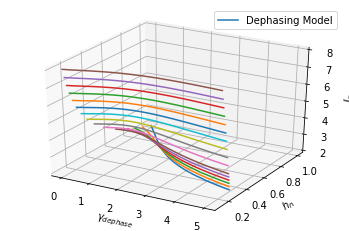

In [15]:
# 3D Main Plot

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('$\gamma_{dephase}$')
ax.set_ylabel('$h_n$')
ax.set_zlabel('$J_n$')

x = dephase_gamma
y = J1
z = h00
a = J2
b = h02
c = J3
d = h04
e = J4
f = h06
g = J5
h = h08
i = J6
j = h10
k = J7
l = h12
m = J8
n = h14
o = J9
p = h16
q = J10
r = h18
s = J11
t = h20
u = J12
v = h22
w = J13
a1 = h24
b1 = J14
c1 = h26
d1 = J15
e1 = h28
f1 = J16
g1 = h30
h1 = J17
i1 = h35
j1 = J18
k1 = h40
l1 = J19
m1 = h45
n1 = J20
o1 = h50
p1 = J21
q1 = h55
r1 = J22
s1 = h60
t1 = J23
u1 = h65
v1 = J24
w1 = h70
a2 = J25
b2 = h75
c2 = J26
d2 = h80

#ax.plot(x, y, z, label='Dephasing Model')
#ax.plot(x,a,b)
#ax.plot(x,c,d)
#ax.plot(x,e,f)
#ax.plot(x,g,h)
#ax.plot(x,i,j)
#ax.plot(x,k,l)
#ax.plot(x,m,n)
#ax.plot(x,o,p)
#ax.plot(x,q,r)
ax.plot(x,s,t,label='Dephasing Model')
ax.plot(x,u,v)
ax.plot(x,w,a1)
ax.plot(x,b1,c1)
ax.plot(x,d1,e1)
ax.plot(x,f1,g1)
ax.plot(x,h1,i1)
ax.plot(x,j1,k1)
ax.plot(x,l1,m1)
ax.plot(x,n1,o1)
ax.plot(x,p1,q1)
ax.plot(x,r1,s1)
ax.plot(x,t1,u1)
ax.plot(x,v1,w1)
ax.plot(x,a2,b2)
ax.plot(x,c2,d2)
ax.legend()
plt.show()

In [16]:
# Z-Z analysis: What happens to current when delta is not = 0?
# I will let delta = 0.5,1.0,1.5 and vary h the same as before
# and get the current for each

In [17]:
dephase_gamma_del = np.arange(0.5,6,0.5)

sigzdel05_h00 = np.array([.529,.6759,.754,.8021,.8346,.8579,.8755,.8893,.9003
,.9092,.9168])
sigzdel05_h05 = np.array([.5556,.6854,.7583,.8043,.8358,.8587,.876,.8896,.9005
,.9095,.917])
sigzdel05_h10 = np.array([.619,.7109,.7701,.8109,.8395,.861,.8776,.8907,.9013
,.9101,.9174])
sigzdel05_h20 = np.array([.7576,.7817,.8078,.8322,.8528,.8697,.8835,.8949,.9044
,.9124,.9192])
sigzdel05_h30 = np.array([.8491,.8445,.8492,.859,.8706,.8819,.8922,.9012,.9091
,.916,.922])
sigzdel05_h40 = np.array([.901,.8898,.8841,.8848,.8894,.8956,.9023,.9089,.915
,.9206,.9257])
sigzdel05_h50 = np.array([.9316,.9197,.9107,.90677,.9068,.9092,.9129,.9171,.922
,.9258,.9299])
sigzdel05_h60 = np.array([.9503,.9397,.9303,.9244,.9218,.9216,.923,.9254,.9282
,.9313,.9344])
sigzdel05_h70 = np.array([.9624,.9534,.9446,.9382,.9343,.9326,.9324,.9332,.9349
,.9369,.9391])
sigzdel05_h80 = np.array([.9707,.9631,.9552,.9489,.9446,.9419,.9407,.9405,.9411
,.9422,.9437])

sigzdel10_h00 = np.array([.6,.701,.7654,.8081,.8381,.8602,.877,.8903,.901,.9099
,.9173])
sigzdel10_h05 = np.array([.619,.709,.7692,.8102,.8393,.8609,.8776,.8907,.9013
,.9101,.9174])
sigzdel10_h10 = np.array([.667,.7306,.7799,.8161,.8428,.8632,.8791,.8918,.9021
,.9107,.9179])
sigzdel10_h20 = np.array([.778,.7926,.8144,.8363,.8555,.8715,.8848,.8959,.9051
,.913,.9197])
sigzdel10_h30 = np.array([.857,.8503,.853,.8618,.8726,.8834,.8933,.902,.9098
,.9165,.9224])
sigzdel10_h40 = np.array([.9048,.8925,.8863,.8866,.8908,.8967,.9032,.9096,.9155
,.921,.926])
sigzdel10_h50 = np.array([.933,.9211,.912,.9079,.9078,.91,.9136,.9177,.922
,.9262,.9302])
sigzdel10_h60 = np.array([.9512,.9405,.9311,.9251,.9225,.9222,.9236,.9258,.9286
,.9316,.9347])
sigzdel10_h70 = np.array([.963,.9539,.9451,.9387,.9348,.933,.9328,.9336,.9352
,.9371,.9393])
sigzdel10_h80 = np.array([.971,.9634,.9556,.9493,.9449,.9422,.941,.9408,.9413
,.9424,.9439])

sigzdel15_h00 = np.array([.68,.7353,.7823,.8175,.8437,.8638,.8795,.8921,.9023
,.9108,.918])
sigzdel15_h05 = np.array([.6923,.7414,.7855,.8193,.8449,.8645,.88,.8924,.9026
,.911,.918])
sigzdel15_h10 = np.array([.7241,.7583,.7946,.8245,.8481,.8667,.8814,.8935,.9033
,.9116,.9186])
sigzdel15_h20 = np.array([.8049,.8087,.8246,.8429,.8598,.8745,.8869,.8974,.9063
,.9138,.9203])
sigzdel15_h30 = np.array([.8689,.8585,.8591,.8663,.8759,.8858,.895,.9034,.9108
,.9173,.9231])
sigzdel15_h40 = np.array([.9101,.8966,.8898,.8895,.8931,.8985,.9046,.9107,.9164
,.9217,.9266])
sigzdel15_h50 = np.array([.936,.9234,.9141,.9098,.9094,.9113,.9147,.9186,.9227
,.9268,.9307])
sigzdel15_h60 = np.array([.9527,.9418,.9323,.9264,.9236,.9232,.9244,.9266,.9292
,.9321,.9351])
sigzdel15_h70 = np.array([.9638,.9547,.9459,.9395,.9356,.9337,.9334,.9342,.9356
,.9375,.9397])
sigzdel15_h80 = np.array([.9715,.9639,.9561,.9499,.9455,.9428,.9415,.9412,.9417
,.9428,.9442])

Jdel05h00 = []
      
for i in range(sigzdel05_h00.size):
    expec_sz_del05_h00 = sigzdel05_h00[i]
    J_del05h00 = 4*boundary_gamma*(mu-expec_sz_del05_h00)
    Jdel05h00.append(J_del05h00.real)
    #print(J_del05h00)
    
Jdel05h05 = []
      
for i in range(sigzdel05_h05.size):
    expec_sz_del05_h05 = sigzdel05_h05[i]
    J_del05h05 = 4*boundary_gamma*(mu-expec_sz_del05_h05)
    Jdel05h05.append(J_del05h05.real)
    #print(J_del05h05)
    
Jdel05h10 = []
      
for i in range(sigzdel05_h10.size):
    expec_sz_del05_h10 = sigzdel05_h10[i]
    J_del05h10 = 4*boundary_gamma*(mu-expec_sz_del05_h10)
    Jdel05h10.append(J_del05h10.real)
    #print(J_del05h10)
    
Jdel05h20 = []
      
for i in range(sigzdel05_h20.size):
    expec_sz_del05_h20 = sigzdel05_h20[i]
    J_del05h20 = 4*boundary_gamma*(mu-expec_sz_del05_h20)
    Jdel05h20.append(J_del05h20.real)
    #print(J_del05h20)
    
Jdel05h30 = []
      
for i in range(sigzdel05_h30.size):
    expec_sz_del05_h30 = sigzdel05_h30[i]
    J_del05h30 = 4*boundary_gamma*(mu-expec_sz_del05_h30)
    Jdel05h30.append(J_del05h30.real)
    #print(J_del05h30)
    
Jdel05h40 = []
      
for i in range(sigzdel05_h40.size):
    expec_sz_del05_h40 = sigzdel05_h40[i]
    J_del05h40 = 4*boundary_gamma*(mu-expec_sz_del05_h40)
    Jdel05h40.append(J_del05h40.real)
    #print(J_del05h40)
    
Jdel05h50 = []
      
for i in range(sigzdel05_h50.size):
    expec_sz_del05_h50 = sigzdel05_h50[i]
    J_del05h50 = 4*boundary_gamma*(mu-expec_sz_del05_h50)
    Jdel05h50.append(J_del05h50.real)
    #print(J_del05h50)
    
Jdel05h60 = []
      
for i in range(sigzdel05_h60.size):
    expec_sz_del05_h60 = sigzdel05_h60[i]
    J_del05h60 = 4*boundary_gamma*(mu-expec_sz_del05_h60)
    Jdel05h60.append(J_del05h60.real)
    #print(J_del05h60)
    
Jdel05h70 = []
      
for i in range(sigzdel05_h70.size):
    expec_sz_del05_h70 = sigzdel05_h70[i]
    J_del05h70 = 4*boundary_gamma*(mu-expec_sz_del05_h70)
    Jdel05h70.append(J_del05h70.real)
    #print(J_del05h70)
    
    
Jdel05h80 = []
      
for i in range(sigzdel05_h80.size):
    expec_sz_del05_h80 = sigzdel05_h80[i]
    J_del05h80 = 4*boundary_gamma*(mu-expec_sz_del05_h80)
    Jdel05h80.append(J_del05h80.real)
    #print(J_del05h80)
    
Jdel10h00 = []
      
for i in range(sigzdel10_h00.size):
    expec_sz_del10_h00 = sigzdel10_h00[i]
    J_del10h00 = 4*boundary_gamma*(mu-expec_sz_del10_h00)
    Jdel10h00.append(J_del10h00.real)
    #print(J_del10h00)
    
Jdel10h05 = []
      
for i in range(sigzdel10_h05.size):
    expec_sz_del10_h05 = sigzdel10_h05[i]
    J_del10h05 = 4*boundary_gamma*(mu-expec_sz_del10_h05)
    Jdel10h05.append(J_del10h05.real)
    #print(J_del10h05)
    
Jdel10h10 = []
      
for i in range(sigzdel10_h10.size):
    expec_sz_del10_h10 = sigzdel10_h10[i]
    J_del10h10 = 4*boundary_gamma*(mu-expec_sz_del10_h10)
    Jdel10h10.append(J_del10h10.real)
    #print(J_del10h10)
    
Jdel10h20 = []
      
for i in range(sigzdel10_h20.size):
    expec_sz_del10_h20 = sigzdel10_h20[i]
    J_del10h20 = 4*boundary_gamma*(mu-expec_sz_del10_h20)
    Jdel10h20.append(J_del10h20.real)
    #print(J_del10h20)
    
Jdel10h30 = []
      
for i in range(sigzdel10_h30.size):
    expec_sz_del10_h30 = sigzdel10_h30[i]
    J_del10h30 = 4*boundary_gamma*(mu-expec_sz_del10_h30)
    Jdel10h30.append(J_del10h30.real)
    #print(J_del10h30)
    
Jdel10h40 = []
      
for i in range(sigzdel10_h40.size):
    expec_sz_del10_h40 = sigzdel10_h40[i]
    J_del10h40 = 4*boundary_gamma*(mu-expec_sz_del10_h40)
    Jdel10h40.append(J_del10h40.real)
    #print(J_del10h40)

Jdel10h50 = []
      
for i in range(sigzdel10_h50.size):
    expec_sz_del10_h50 = sigzdel10_h50[i]
    J_del10h50 = 4*boundary_gamma*(mu-expec_sz_del10_h50)
    Jdel10h50.append(J_del10h50.real)
    #print(J_del10h50)
    
Jdel10h60 = []
      
for i in range(sigzdel10_h60.size):
    expec_sz_del10_h60 = sigzdel10_h60[i]
    J_del10h60 = 4*boundary_gamma*(mu-expec_sz_del10_h60)
    Jdel10h60.append(J_del10h60.real)
    #print(J_del10h60)
    
Jdel10h70 = []
      
for i in range(sigzdel10_h70.size):
    expec_sz_del10_h70 = sigzdel10_h70[i]
    J_del10h70 = 4*boundary_gamma*(mu-expec_sz_del10_h70)
    Jdel10h70.append(J_del10h70.real)
    #print(J_del10h70)
    
Jdel10h80 = []
      
for i in range(sigzdel10_h80.size):
    expec_sz_del10_h80 = sigzdel10_h80[i]
    J_del10h80 = 4*boundary_gamma*(mu-expec_sz_del10_h80)
    Jdel10h80.append(J_del10h80.real)
    #print(J_del10h80)

Jdel15h00 = []
      
for i in range(sigzdel15_h00.size):
    expec_sz_del15_h00 = sigzdel15_h00[i]
    J_del15h00 = 4*boundary_gamma*(mu-expec_sz_del15_h00)
    Jdel15h00.append(J_del15h00.real)
    #print(J_del15h00)
    
Jdel15h05 = []
      
for i in range(sigzdel15_h05.size):
    expec_sz_del15_h05 = sigzdel15_h05[i]
    J_del15h05 = 4*boundary_gamma*(mu-expec_sz_del15_h05)
    Jdel15h05.append(J_del15h05.real)
    #print(J_del15h05)
    
Jdel15h10 = []
      
for i in range(sigzdel15_h10.size):
    expec_sz_del15_h10 = sigzdel15_h10[i]
    J_del15h10 = 4*boundary_gamma*(mu-expec_sz_del15_h10)
    Jdel15h10.append(J_del15h10.real)
    #print(J_del15h10)
    
Jdel15h20 = []
      
for i in range(sigzdel15_h20.size):
    expec_sz_del15_h20 = sigzdel15_h20[i]
    J_del15h20 = 4*boundary_gamma*(mu-expec_sz_del15_h20)
    Jdel15h20.append(J_del15h20.real)
    #print(J_del15h20)
    
Jdel15h30 = []
      
for i in range(sigzdel15_h30.size):
    expec_sz_del15_h30 = sigzdel15_h30[i]
    J_del15h30 = 4*boundary_gamma*(mu-expec_sz_del15_h30)
    Jdel15h30.append(J_del15h30.real)
    #print(J_del15h30)
    
Jdel15h40 = []
      
for i in range(sigzdel15_h40.size):
    expec_sz_del15_h40 = sigzdel15_h40[i]
    J_del15h40 = 4*boundary_gamma*(mu-expec_sz_del15_h40)
    Jdel15h40.append(J_del15h40.real)
    #print(J_del15h40)
    
Jdel15h50 = []
      
for i in range(sigzdel15_h50.size):
    expec_sz_del15_h50 = sigzdel15_h50[i]
    J_del15h50 = 4*boundary_gamma*(mu-expec_sz_del15_h50)
    Jdel15h50.append(J_del15h50.real)
    #print(J_del15h50)
    
Jdel15h60 = []
      
for i in range(sigzdel15_h60.size):
    expec_sz_del15_h60 = sigzdel15_h60[i]
    J_del15h60 = 4*boundary_gamma*(mu-expec_sz_del15_h60)
    Jdel15h60.append(J_del15h60.real)
    #print(J_del15h60)
    
Jdel15h70 = []
      
for i in range(sigzdel15_h70.size):
    expec_sz_del15_h70 = sigzdel15_h70[i]
    J_del15h70 = 4*boundary_gamma*(mu-expec_sz_del15_h70)
    Jdel15h70.append(J_del15h70.real)
    #print(J_del15h70)
    
Jdel15h80 = []
      
for i in range(sigzdel15_h80.size):
    expec_sz_del15_h80 = sigzdel15_h80[i]
    J_del15h80 = 4*boundary_gamma*(mu-expec_sz_del15_h80)
    Jdel15h80.append(J_del15h80.real)
    #print(J_del15h80)

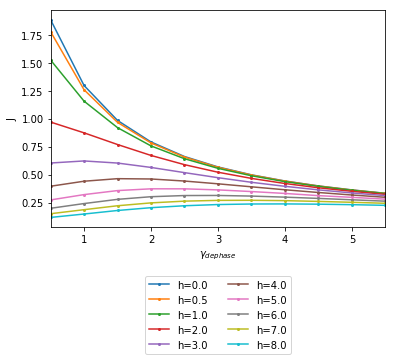

In [18]:
plt.xlabel('$\gamma_{dephase}$')
plt.ylabel('J')
plt.xlim(0.5,5.5)
pylab.plot(dephase_gamma_del,Jdel05h00,'-o',markersize=2,label='h=0.0')
pylab.plot(dephase_gamma_del,Jdel05h05,'-o',markersize=2,label='h=0.5')
pylab.plot(dephase_gamma_del,Jdel05h10,'-o',markersize=2,label='h=1.0')
pylab.plot(dephase_gamma_del,Jdel05h20,'-o',markersize=2,label='h=2.0')
pylab.plot(dephase_gamma_del,Jdel05h30,'-o',markersize=2,label='h=3.0')
pylab.plot(dephase_gamma_del,Jdel05h40,'-o',markersize=2,label='h=4.0')
pylab.plot(dephase_gamma_del,Jdel05h50,'-o',markersize=2,label='h=5.0')
pylab.plot(dephase_gamma_del,Jdel05h60,'-o',markersize=2,label='h=6.0')
pylab.plot(dephase_gamma_del,Jdel05h70,'-o',markersize=2,label='h=7.0')
pylab.plot(dephase_gamma_del,Jdel05h80,'-o',markersize=2,label='h=8.0')
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)
pylab.show()

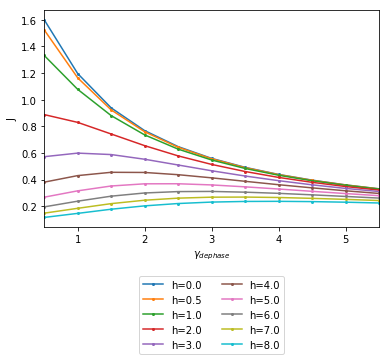

In [19]:
plt.xlabel('$\gamma_{dephase}$')
plt.ylabel('J')
plt.xlim(0.5,5.5)
pylab.plot(dephase_gamma_del,Jdel10h00,'-o',markersize=2,label='h=0.0')
pylab.plot(dephase_gamma_del,Jdel10h05,'-o',markersize=2,label='h=0.5')
pylab.plot(dephase_gamma_del,Jdel10h10,'-o',markersize=2,label='h=1.0')
pylab.plot(dephase_gamma_del,Jdel10h20,'-o',markersize=2,label='h=2.0')
pylab.plot(dephase_gamma_del,Jdel10h30,'-o',markersize=2,label='h=3.0')
pylab.plot(dephase_gamma_del,Jdel10h40,'-o',markersize=2,label='h=4.0')
pylab.plot(dephase_gamma_del,Jdel10h50,'-o',markersize=2,label='h=5.0')
pylab.plot(dephase_gamma_del,Jdel10h60,'-o',markersize=2,label='h=6.0')
pylab.plot(dephase_gamma_del,Jdel10h70,'-o',markersize=2,label='h=7.0')
pylab.plot(dephase_gamma_del,Jdel10h80,'-o',markersize=2,label='h=8.0')
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)
pylab.show()

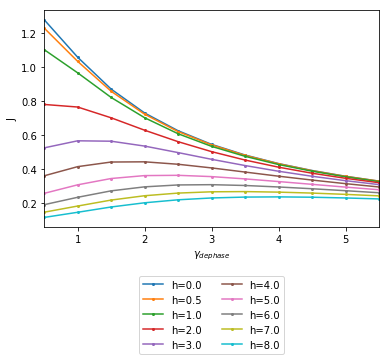

In [20]:
plt.xlabel('$\gamma_{dephase}$')
plt.ylabel('J')
plt.xlim(0.5,5.5)
pylab.plot(dephase_gamma_del,Jdel15h00,'-o',markersize=2,label='h=0.0')
pylab.plot(dephase_gamma_del,Jdel15h05,'-o',markersize=2,label='h=0.5')
pylab.plot(dephase_gamma_del,Jdel15h10,'-o',markersize=2,label='h=1.0')
pylab.plot(dephase_gamma_del,Jdel15h20,'-o',markersize=2,label='h=2.0')
pylab.plot(dephase_gamma_del,Jdel15h30,'-o',markersize=2,label='h=3.0')
pylab.plot(dephase_gamma_del,Jdel15h40,'-o',markersize=2,label='h=4.0')
pylab.plot(dephase_gamma_del,Jdel15h50,'-o',markersize=2,label='h=5.0')
pylab.plot(dephase_gamma_del,Jdel15h60,'-o',markersize=2,label='h=6.0')
pylab.plot(dephase_gamma_del,Jdel15h70,'-o',markersize=2,label='h=7.0')
pylab.plot(dephase_gamma_del,Jdel15h80,'-o',markersize=2,label='h=8.0')
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)
pylab.show()